# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings


In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 99.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df1 = pd.read_parquet('yellow_tripdata_2023-01.parquet')
df1.info()
df1.head()
# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
hour_data = pd.DataFrame()
sampled_data = pd.DataFrame()
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself
sample = hour_data.sample(frac = 0.05, random_state = 45)
sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
# read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/EDA Assignment')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_month = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df_month['tpep_pickup_datetime'].dt.date.unique():
            df_day = df_month[df_month['tpep_pickup_datetime'].dt.date == date]
            # Iterate through each hour of the selected date
            for hour in range(0,24):
                hour_data = df_day[df_day['tpep_pickup_datetime'].dt.hour == hour]

                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac = 0.05, random_state = 45)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Error reading file Zones: Error creating dataset. Could not read schema from '/content/drive/MyDrive/EDA Assignment/Zones/taxi_zones.dbf'. Is this a 'parquet' file?: Could not open Parquet input source '/content/drive/MyDrive/EDA Assignment/Zones/taxi_zones.dbf': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016213 entries, 0 to 2016212
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [9]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('TLC_NY data_2023.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [10]:
# Load the new data file
df_new = pd.read_parquet('TLC_NY data_2023.parquet')


In [11]:
# df.head()
df_new.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:36:40,2023-01-01 01:01:20,1.0,4.09,1.0,N,114,141,1,24.70,1.0,0.5,5.94,0.00,1.0,35.64,2.5,0.00,NaN
1,2,2023-01-01 00:38:00,2023-01-01 00:54:00,NaN,3.72,NaN,None,141,166,0,21.56,0.0,0.5,2.56,0.00,1.0,28.12,NaN,NaN,NaN
2,2,2023-01-01 00:35:59,2023-01-01 00:40:13,1.0,0.97,1.0,N,68,249,1,6.50,1.0,0.5,2.88,0.00,1.0,14.38,2.5,0.00,NaN
3,1,2023-01-01 00:44:15,2023-01-01 00:47:00,4.0,0.50,1.0,N,264,264,1,5.10,1.0,0.5,1.95,2.45,1.0,12.00,0.0,0.00,NaN
4,1,2023-01-01 00:17:52,2023-01-01 00:27:23,0.0,1.60,1.0,N,238,262,1,11.40,3.5,0.5,4.90,0.00,1.0,21.30,2.5,0.00,NaN
5,2,2023-01-01 00:15:06,2023-01-01 00:41:07,1.0,18.05,1.0,N,132,248,1,66.70,1.0,0.5,5.00,6.55,1.0,82.00,0.0,1.25,NaN
6,2,2023-01-01 00:43:06,2023-01-01 00:59:47,1.0,2.87,1.0,N,236,170,1,19.10,1.0,0.5,4.82,0.00,1.0,28.92,2.5,0.00,NaN
7,2,2023-01-01 00:22:01,2023-01-01 00:35:29,1.0,2.12,1.0,N,246,79,1,14.20,1.0,0.5,1.00,0.00,1.0,20.20,2.5,0.00,NaN
8,2,2023-01-01 00:11:16,2023-01-01 00:39:11,1.0,4.34,1.0,N,43,125,1,26.80,1.0,0.5,9.54,0.00,1.0,41.34,2.5,0.00,NaN
9,2,2023-01-01 00:23:04,2023-01-01 00:38:53,1.0,3.48,1.0,N,229,238,1,17.70,1.0,0.5,5.68,0.00,1.0,28.38,2.5,0.00,NaN


In [12]:
# df.info()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016213 entries, 0 to 2016212
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [13]:
# Fix the index and drop any columns that are not needed
df_new.drop(columns=['store_and_fwd_flag'], inplace=True, errors='ignore')
df_new.reset_index(drop=True, inplace=True)
df_new.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:36:40,2023-01-01 01:01:20,1.0,4.09,1.0,114,141,1,24.70,1.0,0.5,5.94,0.00,1.0,35.64,2.5,0.0,NaN
1,2,2023-01-01 00:38:00,2023-01-01 00:54:00,NaN,3.72,NaN,141,166,0,21.56,0.0,0.5,2.56,0.00,1.0,28.12,NaN,NaN,NaN
2,2,2023-01-01 00:35:59,2023-01-01 00:40:13,1.0,0.97,1.0,68,249,1,6.50,1.0,0.5,2.88,0.00,1.0,14.38,2.5,0.0,NaN
3,1,2023-01-01 00:44:15,2023-01-01 00:47:00,4.0,0.50,1.0,264,264,1,5.10,1.0,0.5,1.95,2.45,1.0,12.00,0.0,0.0,NaN
4,1,2023-01-01 00:17:52,2023-01-01 00:27:23,0.0,1.60,1.0,238,262,1,11.40,3.5,0.5,4.90,0.00,1.0,21.30,2.5,0.0,NaN


In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016213 entries, 0 to 2016212
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  Airport_fee           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [15]:
df.airport_fee.unique()

array([ 0.  ,   nan,  1.25, -1.25])

In [16]:
df.Airport_fee.unique()

array([  nan,  0.  ,  1.25, -1.25,  1.75, -1.75])

In [17]:
# Combine the two airport fee columns
df_new['airport_fee'] = df_new['airport_fee'].fillna(df['Airport_fee'])
df_new.drop(columns='Airport_fee', inplace=True)
df_new.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:36:40,2023-01-01 01:01:20,1.0,4.09,1.0,114,141,1,24.70,1.0,0.5,5.94,0.00,1.0,35.64,2.5,0.0
1,2,2023-01-01 00:38:00,2023-01-01 00:54:00,NaN,3.72,NaN,141,166,0,21.56,0.0,0.5,2.56,0.00,1.0,28.12,NaN,NaN
2,2,2023-01-01 00:35:59,2023-01-01 00:40:13,1.0,0.97,1.0,68,249,1,6.50,1.0,0.5,2.88,0.00,1.0,14.38,2.5,0.0
3,1,2023-01-01 00:44:15,2023-01-01 00:47:00,4.0,0.50,1.0,264,264,1,5.10,1.0,0.5,1.95,2.45,1.0,12.00,0.0,0.0
4,1,2023-01-01 00:17:52,2023-01-01 00:27:23,0.0,1.60,1.0,238,262,1,11.40,3.5,0.5,4.90,0.00,1.0,21.30,2.5,0.0


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016213 entries, 0 to 2016212
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[us](2), 

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [20]:
# check where values of fare amount are negative
fare_neg=df_new[df_new['fare_amount'] < 0]
len(fare_neg)

19996

In [21]:
len(fare_neg)/len(df_new)*100

0.9917602951672269

In [22]:
df_new.loc[fare_neg.index, 'fare_amount'] = 0

In [23]:
fare_neg=df_new[df_new['fare_amount'] < 0]
len(fare_neg)

0

In [24]:
(df_new['fare_amount'] == 0).sum()

np.int64(20702)

Did you notice something different in the `RatecodeID` column for above records?

In [25]:
# Analyse RatecodeID for the negative fare amounts
fare_zero_df = df_new[df_new['fare_amount'] == 0].reset_index(drop=True)

In [26]:
# Find which columns have negative values
fare_zero_df.head(30)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:17:41,2023-01-01 00:20:24,1.0,0.23,1.0,170,170,4,0.0,-1.0,-0.5,0.0,0.00,-1.0,-9.40,-2.5,0.00
1,2,2023-01-01 01:32:27,2023-01-01 01:38:57,1.0,1.47,1.0,100,90,4,0.0,-1.0,-0.5,0.0,0.00,-1.0,-14.30,-2.5,0.00
2,2,2023-01-01 02:22:14,2023-01-01 02:34:47,2.0,3.90,1.0,107,75,2,0.0,-1.0,-0.5,0.0,0.00,-1.0,-22.70,-2.5,0.00
3,2,2023-01-01 02:21:13,2023-01-01 02:48:02,1.0,4.62,1.0,161,223,4,0.0,-1.0,-0.5,0.0,0.00,-1.0,-32.50,-2.5,0.00
4,2,2023-01-01 02:06:24,2023-01-01 02:06:39,1.0,0.05,2.0,97,97,2,0.0,0.0,-0.5,0.0,0.00,-1.0,-71.50,0.0,0.00
5,2,2023-01-01 03:48:13,2023-01-01 03:58:41,1.0,1.17,1.0,116,244,4,0.0,-1.0,-0.5,0.0,0.00,-1.0,-11.80,0.0,0.00
6,2,2023-01-01 04:59:57,2023-01-01 05:09:54,1.0,2.41,1.0,249,230,4,0.0,-1.0,-0.5,0.0,0.00,-1.0,-18.50,-2.5,0.00
7,2,2023-01-01 04:11:25,2023-01-01 04:29:08,1.0,4.60,1.0,163,74,4,0.0,-1.0,-0.5,0.0,0.00,-1.0,-27.60,-2.5,0.00
8,2,2023-01-01 05:22:16,2023-01-01 05:36:58,1.0,3.55,1.0,230,263,4,0.0,-1.0,-0.5,0.0,0.00,-1.0,-23.40,-2.5,0.00
9,2,2023-01-01 05:10:07,2023-01-01 05:28:30,2.0,4.39,1.0,68,65,2,0.0,-1.0,-0.5,0.0,0.00,-1.0,-26.90,-2.5,0.00


In [27]:
len(fare_zero_df)/len(df_new)*100

1.0267764368149594

In [28]:
# fix these negative values
df_new = df_new.drop(fare_zero_df.index).reset_index(drop=True)

In [29]:
df_new.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2023-01-05 21:42:49,2023-01-05 21:52:45,1.0,2.10,1.0,148,233,1,12.8,3.5,0.5,3.56,0.00,1.0,21.36,2.5,0.0
1,2,2023-01-05 21:13:55,2023-01-05 21:27:31,1.0,3.68,1.0,107,226,1,17.7,1.0,0.5,7.31,6.55,1.0,36.56,2.5,0.0
2,2,2023-01-05 21:43:31,2023-01-05 22:02:07,2.0,4.62,1.0,68,262,1,22.6,1.0,0.5,5.52,0.00,1.0,33.12,2.5,0.0
3,1,2023-01-05 21:32:04,2023-01-05 21:42:21,1.0,2.30,1.0,162,114,1,12.1,3.5,0.5,3.40,0.00,1.0,20.50,2.5,0.0
4,2,2023-01-05 21:00:51,2023-01-05 21:05:17,1.0,0.92,1.0,229,140,1,6.5,1.0,0.5,2.00,0.00,1.0,13.50,2.5,0.0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [30]:
# Find the proportion of missing values in each column
df_new.isna().sum()/len(df_new)*100

,0
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,3.784945
trip_distance,0.000000
RatecodeID,3.784945
PULocationID,0.000000
DOLocationID,0.000000
payment_type,0.000000
fare_amount,0.000000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [31]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df_new['passenger_count'] = df_new['passenger_count'].fillna(df_new['passenger_count'].median())

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [32]:
df_new['RatecodeID'].mode()[0]

np.float64(1.0)

In [33]:
# Fix missing values in 'RatecodeID'
df_new['RatecodeID'] = df_new['RatecodeID'].fillna(df_new['RatecodeID'].mode()[0])

In [34]:
df_new.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [35]:
df_new.head(30)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2023-01-05 21:42:49,2023-01-05 21:52:45,1.0,2.10,1.0,148,233,1,12.8,3.5,0.5,3.56,0.00,1.0,21.36,2.5,0.00
1,2,2023-01-05 21:13:55,2023-01-05 21:27:31,1.0,3.68,1.0,107,226,1,17.7,1.0,0.5,7.31,6.55,1.0,36.56,2.5,0.00
2,2,2023-01-05 21:43:31,2023-01-05 22:02:07,2.0,4.62,1.0,68,262,1,22.6,1.0,0.5,5.52,0.00,1.0,33.12,2.5,0.00
3,1,2023-01-05 21:32:04,2023-01-05 21:42:21,1.0,2.30,1.0,162,114,1,12.1,3.5,0.5,3.40,0.00,1.0,20.50,2.5,0.00
4,2,2023-01-05 21:00:51,2023-01-05 21:05:17,1.0,0.92,1.0,229,140,1,6.5,1.0,0.5,2.00,0.00,1.0,13.50,2.5,0.00
5,2,2023-01-05 21:36:12,2023-01-05 21:58:13,1.0,4.79,1.0,107,75,1,26.1,1.0,0.5,6.22,0.00,1.0,37.32,2.5,0.00
6,1,2023-01-05 21:40:10,2023-01-05 21:51:20,1.0,3.50,1.0,107,236,2,16.3,3.5,0.5,0.00,0.00,1.0,21.30,2.5,0.00
7,2,2023-01-05 21:52:58,2023-01-05 22:28:18,1.0,17.76,2.0,132,230,1,70.0,0.0,0.5,18.50,0.00,1.0,93.75,2.5,1.25
8,2,2023-01-05 21:26:22,2023-01-05 21:30:04,1.0,0.99,1.0,229,141,1,6.5,1.0,0.5,2.30,0.00,1.0,13.80,2.5,0.00
9,1,2023-01-05 21:17:18,2023-01-05 21:29:23,1.0,2.80,1.0,107,141,1,14.2,3.5,0.5,3.80,0.00,1.0,23.00,2.5,0.00


In [36]:
df_new['congestion_surcharge'].median()

2.5

In [37]:
df_new['congestion_surcharge'].mode()

,congestion_surcharge
0,2.5


In [38]:
# handle null values in congestion_surcharge
df_new['congestion_surcharge'] = df_new['congestion_surcharge'].fillna(df_new['congestion_surcharge'].median())

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [39]:
df_new.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2023-01-05 21:42:49,2023-01-05 21:52:45,1.0,2.10,1.0,148,233,1,12.8,3.5,0.5,3.56,0.00,1.0,21.36,2.5,0.0
1,2,2023-01-05 21:13:55,2023-01-05 21:27:31,1.0,3.68,1.0,107,226,1,17.7,1.0,0.5,7.31,6.55,1.0,36.56,2.5,0.0
2,2,2023-01-05 21:43:31,2023-01-05 22:02:07,2.0,4.62,1.0,68,262,1,22.6,1.0,0.5,5.52,0.00,1.0,33.12,2.5,0.0
3,1,2023-01-05 21:32:04,2023-01-05 21:42:21,1.0,2.30,1.0,162,114,1,12.1,3.5,0.5,3.40,0.00,1.0,20.50,2.5,0.0
4,2,2023-01-05 21:00:51,2023-01-05 21:05:17,1.0,0.92,1.0,229,140,1,6.5,1.0,0.5,2.00,0.00,1.0,13.50,2.5,0.0


In [40]:
# Handle any remaining missing values
df_new.loc[(df_new['RatecodeID'] == 2) & (df_new['airport_fee'].isna()), 'airport_fee'] = 1.25
df_new.loc[(df_new['RatecodeID'] != 2) & (df_new['airport_fee'].isna()), 'airport_fee'] = 0

In [41]:
df_new.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [43]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df_new.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1.995511e+06,1995511,1995511,1.995511e+06,1.995511e+06,1.995511e+06,1.995511e+06,1.995511e+06,1.995511e+06,1.995511e+06,1.995511e+06,1.995511e+06,1.995511e+06,1.995511e+06,1.995511e+06,1.995511e+06,1.995511e+06,1.995511e+06
mean,1.740297e+00,2023-07-04 19:56:25.061208,2023-07-04 19:59:47.861194,1.357069e+00,4.247980e+00,1.620308e+00,1.651399e+02,1.638896e+02,1.179959e+00,1.971441e+01,1.545802e+00,4.856281e-01,3.517232e+00,5.883592e-01,9.794634e-01,2.844197e+01,2.272925e+00,1.350244e-01
min,1.000000e+00,2023-01-01 00:05:03,1970-01-20 10:16:32,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-7.500000e+00,-5.000000e-01,-8.527000e+01,-5.025000e+01,-1.000000e+00,-8.075500e+02,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,2023-04-05 16:34:20,2023-04-05 16:54:33.500000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-29 16:36:43,2023-06-29 17:05:58,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-07 19:29:20,2023-10-07 19:48:49.500000,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.410000e+00,0.000000e+00,1.000000e+00,3.080000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-12-31 23:59:52,2024-01-01 22:02:16,9.000000e+00,2.259874e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.375000e+03,6.733000e+01,4.000000e+00,4.400800e+02,9.990000e+01,1.000000e+00,1.435190e+03,2.500000e+00,1.750000e+00
std,4.444313e-01,NaN,NaN,8.807230e-01,2.458674e+02,7.304542e+00,6.404541e+01,6.981363e+01,5.598352e-01,1.835287e+01,1.839208e+00,1.085465e-01,4.071288e+00,2.189490e+00,1.989513e-01,2.358791e+01,7.839532e-01,4.613306e-01


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [44]:
# remove passenger_count > 6
df_new = df_new[df_new['passenger_count'] <= 6]

In [45]:
# Continue with outlier handling
df_new = df_new[~((df_new['trip_distance'] < 0.1) & (df_new['fare_amount'] > 300))]
df_new = df_new[~((df_new['trip_distance'] == 0) & (df_new['fare_amount'] == 0) & (df_new['PULocationID'] != df_new['DOLocationID']))]
df_new = df_new[df_new['trip_distance'] < 250]
df_new = df_new[df_new['payment_type'] != 0]
df_new = df_new.drop_duplicates()

In [46]:
df_new.RatecodeID.unique()

array([ 1.,  2.,  3., 99.,  4.,  5.,  6.])

In [47]:
df_new = df_new[(df_new['RatecodeID'] >= 1) & (df_new['RatecodeID'] <= 6)]

In [48]:
(df_new['total_amount'] == 0).sum()

np.int64(227)

In [49]:
df_new = df_new[~((df_new['total_amount'] == 0) & (df_new[['fare_amount', 'tip_amount', 'tolls_amount']].sum(axis=1) > 0))]

In [50]:
df_new.passenger_count.unique()

array([1., 2., 4., 3., 5., 0., 6.])

In [51]:
df_new = df_new[df_new['passenger_count'] > 0]

In [52]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1784850 entries, 0 to 1895902
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[us](2), float

In [53]:
# Do any columns need standardising?
df_new['trip_duration'] = (df_new['tpep_dropoff_datetime'] - df_new['tpep_pickup_datetime']).dt.total_seconds() / 60
df_new['trip_duration'] = (df_new['trip_duration'] - df_new['trip_duration'].mean()) / df_new['trip_duration'].std()

In [54]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1784850 entries, 0 to 1895902
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  trip_duration          floa

In [55]:
df_new.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
count,1.784850e+06,1784850,1784850,1.784850e+06,1.784850e+06,1.784850e+06,1.784850e+06,1.784850e+06,1.784850e+06,1.784850e+06,1.784850e+06,1.784850e+06,1.784850e+06,1.784850e+06,1.784850e+06,1.784850e+06,1.784850e+06,1.784850e+06,1.784850e+06
mean,1.760371e+00,2023-07-03 23:41:35.064083,2023-07-03 23:58:56.788036,1.395554e+00,3.441667e+00,1.076805e+00,1.655007e+02,1.643584e+02,1.227198e+00,1.955517e+01,1.582446e+00,4.850645e-01,3.574054e+00,5.842595e-01,9.785881e-01,2.837839e+01,2.276689e+00,1.417728e-01,-2.318515e-16
min,1.000000e+00,2023-01-01 00:05:03,2023-01-01 00:10:39,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-7.500000e+00,-5.000000e-01,-8.527000e+01,-5.025000e+01,-1.000000e+00,-8.075500e+02,-2.500000e+00,-1.750000e+00,-1.756464e+00
25%,2.000000e+00,2023-04-04 21:07:58.250000,2023-04-04 21:20:48.250000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.580000e+01,2.500000e+00,0.000000e+00,-2.298263e-01
50%,2.000000e+00,2023-06-28 14:07:10.500000,2023-06-28 14:23:58.500000,1.000000e+00,1.780000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.860000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00,-1.140771e-01
75%,2.000000e+00,2023-10-06 20:41:44.250000,2023-10-06 20:58:34.750000,1.000000e+00,3.350000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.450000e+00,0.000000e+00,1.000000e+00,3.060000e+01,2.500000e+00,0.000000e+00,7.127806e-02
max,2.000000e+00,2023-12-31 23:59:52,2024-01-01 22:02:16,6.000000e+00,2.410000e+02,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,1.375000e+03,6.733000e+01,4.000000e+00,4.400800e+02,9.990000e+01,1.000000e+00,1.435190e+03,2.500000e+00,1.750000e+00,8.703725e+01
std,4.268569e-01,NaN,NaN,8.871730e-01,4.560913e+00,4.007433e-01,6.354695e+01,6.967354e+01,5.194669e-01,1.838065e+01,1.841819e+00,1.110435e-01,4.095010e+00,2.178996e+00,2.041622e-01,2.376357e+01,7.831263e-01,4.717553e-01,1.000000e+00


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [56]:
df_new.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [57]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1784850 entries, 0 to 1895902
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  trip_duration          floa

In [58]:
#The categorical values are:
#VendorID:
#tpep_pickup_datetime:
#tpep_dropoff_datetime:
#passenger_count:
#trip_distance:
#RatecodeID:
#PULocationID:
#DOLocationID:
#payment_type:
#pickup_hour:
#trip_duration:

In [59]:
# These are numerical values:
#fare_amount
#extra
#mta_tax
#tip_amount
#tolls_amount
#improvement_surcharge
#total_amount
#congestion_surcharge
#airport_fee

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

Text(0, 0.5, 'Number of pickups')

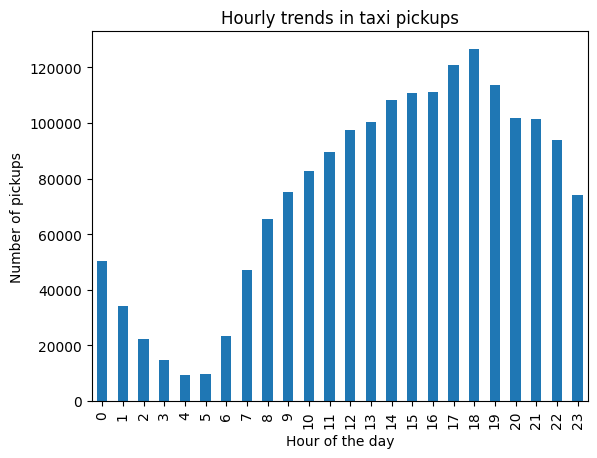

In [60]:
# Find and show the hourly trends in taxi pickups
df_new['hourly_pickups'] = df_new['tpep_pickup_datetime'].dt.hour
df_new['hourly_pickups'].value_counts().sort_index().plot(kind='bar')
plt.title('Hourly trends in taxi pickups')
plt.xlabel('Hour of the day')
plt.ylabel('Number of pickups')

Text(0, 0.5, 'Number of pickups')

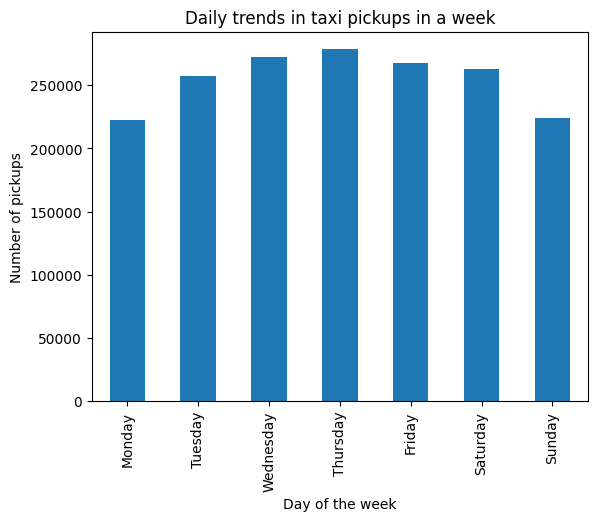

In [61]:
# Find and show the daily trends in taxi pickups (days of the week)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_new['pickup_day'] = df_new['tpep_pickup_datetime'].dt.day_name()
df_new['pickup_day'].value_counts().loc[day_order].plot(kind='bar')
plt.title('Daily trends in taxi pickups in a week')
plt.xlabel('Day of the week')
plt.ylabel('Number of pickups')

Text(0, 0.5, 'Number of pickups')

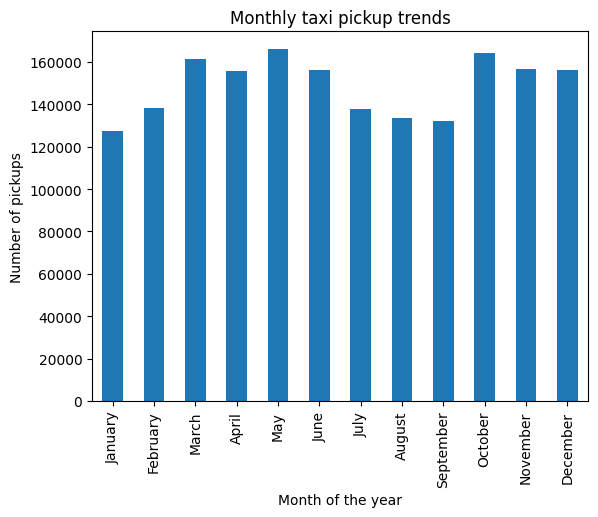

In [62]:
# Show the monthly trends in pickups
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_new['pickup_month'] = df_new['tpep_pickup_datetime'].dt.month_name()
df_new['pickup_month'].value_counts().loc[month_order].plot(kind='bar')
plt.title('Monthly taxi pickup trends')
plt.xlabel('Month of the year')
plt.ylabel('Number of pickups')

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [63]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in columns_to_check:
    num_zero = (df_new[col] == 0).sum()
    num_negative = (df_new[col] < 0).sum()
    print(col + ": " + str(num_zero) + " zeros, " + str(num_negative) + " negatives")

fare_amount: 18994 zeros, 0 negatives
tip_amount: 403274 zeros, 78 negatives
total_amount: 215 zeros, 18576 negatives
trip_distance: 22045 zeros, 0 negatives


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [64]:
# Create a df with non zero entries for the selected parameters.
selected_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df_nonzero = df_new[(df_new[selected_cols] != 0).all(axis=1)]

In [65]:
df_nonzero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1373209 entries, 0 to 1895902
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1373209 non-null  int64         
 1   tpep_pickup_datetime   1373209 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1373209 non-null  datetime64[us]
 3   passenger_count        1373209 non-null  float64       
 4   trip_distance          1373209 non-null  float64       
 5   RatecodeID             1373209 non-null  float64       
 6   PULocationID           1373209 non-null  int64         
 7   DOLocationID           1373209 non-null  int64         
 8   payment_type           1373209 non-null  int64         
 9   fare_amount            1373209 non-null  float64       
 10  extra                  1373209 non-null  float64       
 11  mta_tax                1373209 non-null  float64       
 12  tip_amount             1373209 no

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<ipython-input-66-29d56a578803>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzero['month'] = df_nonzero['tpep_pickup_datetime'].dt.to_period('M')


Text(0, 0.5, 'Total amount')

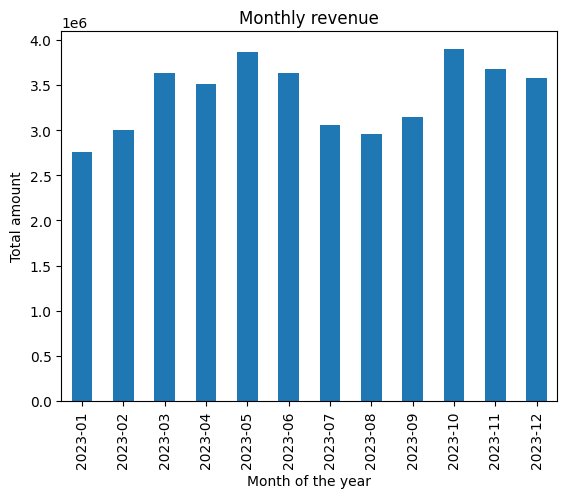

In [66]:
# Group data by month and analyse monthly revenue
df_nonzero['month'] = df_nonzero['tpep_pickup_datetime'].dt.to_period('M')
df_nonzero.groupby('month')['total_amount'].sum().plot(kind='bar')
plt.title('Monthly revenue')
plt.xlabel('Month of the year')
plt.ylabel('Total amount')

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [67]:
# Calculate proportion of each quarter
df_new['quarter'] = df_new['tpep_pickup_datetime'].dt.to_period('Q')
quarter_revenue = df_new.groupby('quarter')['total_amount'].sum()
quarter_proportion = (quarter_revenue / quarter_revenue.sum()) * 100
quarter_proportion


,total_amount
quarter,
2023Q1,22.878764
2023Q2,27.040978
2023Q3,22.965581
2023Q4,27.114677


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

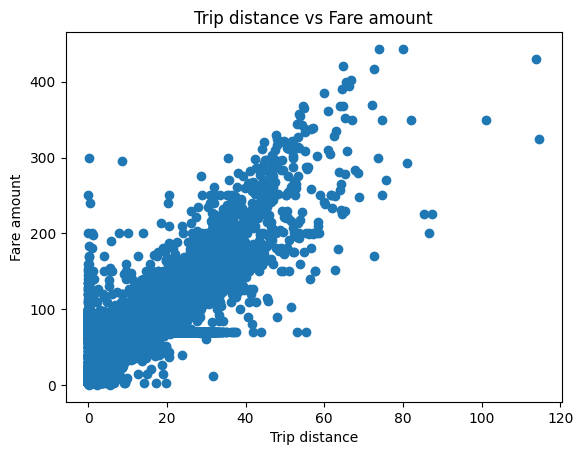

In [68]:
# Show how trip fare is affected by distance
plt.scatter(df_nonzero['trip_distance'], df_nonzero['fare_amount'])
plt.title('Trip distance vs Fare amount')
plt.xlabel('Trip distance')
plt.ylabel('Fare amount')
plt.show()

In [69]:
corr_dist_fare = df_nonzero['trip_distance'].corr(df_nonzero['fare_amount'])
corr_dist_fare

np.float64(0.9513791363310893)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

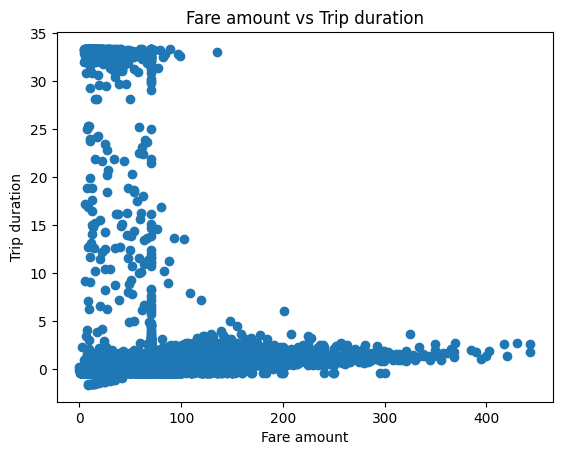

In [70]:
# Show relationship between fare and trip duration
plt.scatter(df_nonzero['fare_amount'], df_nonzero['trip_duration'])
plt.title('Fare amount vs Trip duration')
plt.xlabel('Fare amount')
plt.ylabel('Trip duration')
plt.show()

In [71]:
corr_fare_dur = df_nonzero['fare_amount'].corr(df_nonzero['trip_duration'])
corr_fare_dur

np.float64(0.3104515401398683)

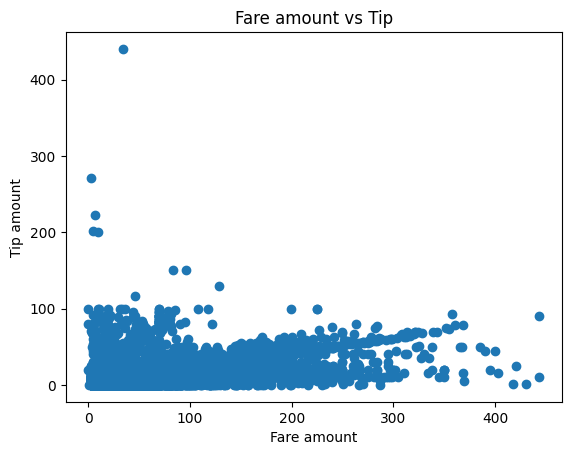

In [72]:
plt.scatter(df_nonzero['fare_amount'], df_nonzero['tip_amount'])
plt.title('Fare amount vs Tip')
plt.xlabel('Fare amount')
plt.ylabel('Tip amount')
plt.show()

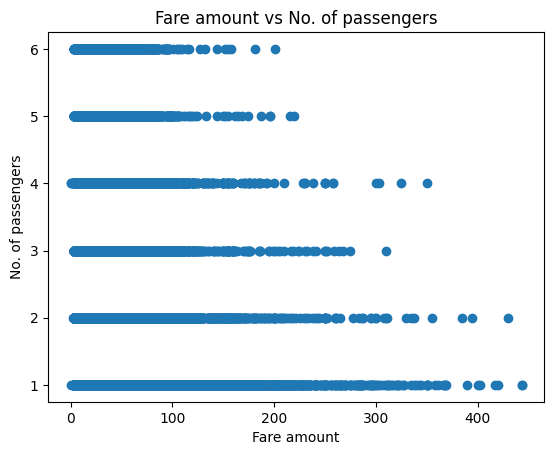

In [73]:
# Show relationship between fare and number of passengers
plt.scatter(df_nonzero['fare_amount'], df_nonzero['passenger_count'])
plt.title('Fare amount vs No. of passengers')
plt.xlabel('Fare amount')
plt.ylabel('No. of passengers')
plt.show()

In [74]:
corr_fare_pass = df_nonzero['fare_amount'].corr(df_nonzero['passenger_count'])
corr_fare_pass

np.float64(0.036528914204165985)

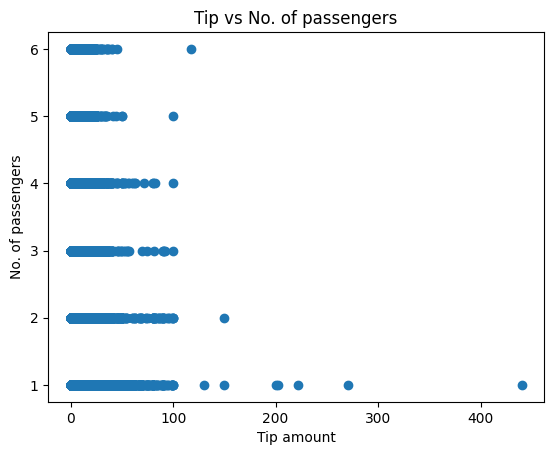

In [75]:
plt.scatter(df_nonzero['tip_amount'], df_nonzero['passenger_count'])
plt.title('Tip vs No. of passengers')
plt.xlabel('Tip amount')
plt.ylabel('No. of passengers')
plt.show()

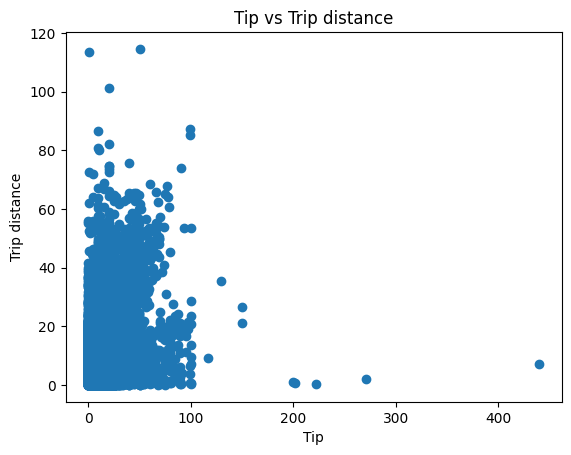

In [76]:
# Show relationship between tip and trip distance
plt.scatter(df_nonzero['tip_amount'], df_nonzero['trip_distance'])
plt.title('Tip vs Trip distance')
plt.xlabel('Tip')
plt.ylabel('Trip distance')
plt.show()

In [77]:
corr_tip_dist = df_nonzero['tip_amount'].corr(df_nonzero['trip_distance'])
corr_tip_dist

np.float64(0.8016125699754001)

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<ipython-input-78-40200506d838>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzero['payment_type_label'] = df_nonzero['payment_type'].map(payment_map)


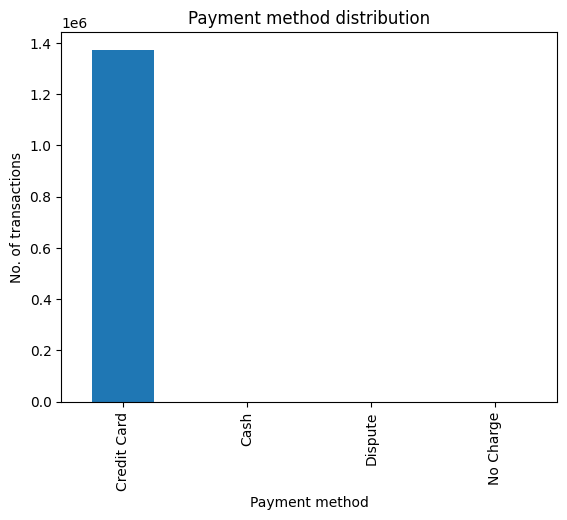

In [78]:
# Analyse the distribution of different payment types (payment_type).
payment_map = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided Trip'}
df_nonzero['payment_type_label'] = df_nonzero['payment_type'].map(payment_map)
df_nonzero['payment_type_label'].value_counts().plot(kind='bar')
plt.title('Payment method distribution')
plt.xlabel('Payment method')
plt.ylabel('No. of transactions')
plt.show()

In [79]:
df_nonzero['payment_type_label'].value_counts()

,count
payment_type_label,
Credit Card,1373165
Cash,17
Dispute,17
No Charge,10


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [80]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [81]:
os.listdir('/content/drive/MyDrive/EDA Assignment/Zones')

['taxi_zones.prj',
 'taxi_zones.dbf',
 'taxi_zones.sbn',
 'taxi_zones.shp.xml',
 'taxi_zones.sbx',
 'taxi_zones.shp',
 'taxi_zones.shx']

In [82]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/EDA Assignment/Zones') # read the .shp file using gpd

zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [83]:
# print(zones.info())
# zones.plot()
print(zones.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

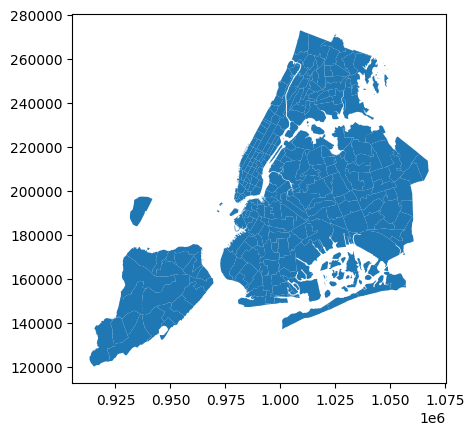

In [85]:
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [86]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

In [87]:
# Merge zones and trip records using locationID and PULocationID
merged_df = df_nonzero.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')
merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_month,month,payment_type_label,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,2023-01-05 21:42:49,2023-01-05 21:52:45,1.0,2.10,1.0,148,233,1,12.8,...,January,2023-01,Credit Card,148.0,0.039131,0.000070,Lower East Side,148.0,Manhattan,"POLYGON ((988552.836 201677.665, 988387.669 20..."
1,2,2023-01-05 21:13:55,2023-01-05 21:27:31,1.0,3.68,1.0,107,226,1,17.7,...,January,2023-01,Credit Card,107.0,0.038041,0.000075,Gramercy,107.0,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20..."
2,2,2023-01-05 21:43:31,2023-01-05 22:02:07,2.0,4.62,1.0,68,262,1,22.6,...,January,2023-01,Credit Card,68.0,0.049337,0.000111,East Chelsea,68.0,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20..."
3,1,2023-01-05 21:32:04,2023-01-05 21:42:21,1.0,2.30,1.0,162,114,1,12.1,...,January,2023-01,Credit Card,162.0,0.035270,0.000048,Midtown East,162.0,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21..."
4,2,2023-01-05 21:00:51,2023-01-05 21:05:17,1.0,0.92,1.0,229,140,1,6.5,...,January,2023-01,Credit Card,229.0,0.042525,0.000095,Sutton Place/Turtle Bay North,229.0,Manhattan,"POLYGON ((994880.664 214401.395, 994724.359 21..."


In [88]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373236 entries, 0 to 1373235
Data columns (total 31 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1373236 non-null  int64         
 1   tpep_pickup_datetime   1373236 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1373236 non-null  datetime64[us]
 3   passenger_count        1373236 non-null  float64       
 4   trip_distance          1373236 non-null  float64       
 5   RatecodeID             1373236 non-null  float64       
 6   PULocationID           1373236 non-null  int64         
 7   DOLocationID           1373236 non-null  int64         
 8   payment_type           1373236 non-null  int64         
 9   fare_amount            1373236 non-null  float64       
 10  extra                  1373236 non-null  float64       
 11  mta_tax                1373236 non-null  float64       
 12  tip_amount             13732

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [89]:
# Group data by location and calculate the number of trips
num_trips = df_new.groupby('PULocationID').size().reset_index(name='trip_count')
num_trips.head()

,PULocationID,trip_count
0,1,245
1,2,2
2,3,5
3,4,1807
4,6,25


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [90]:
# Merge trip counts back to the zones GeoDataFrame
zones=zones.merge(num_trips, left_on='LocationID', right_on='PULocationID', how='left')
zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,245.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,5.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1807.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN,NaN


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

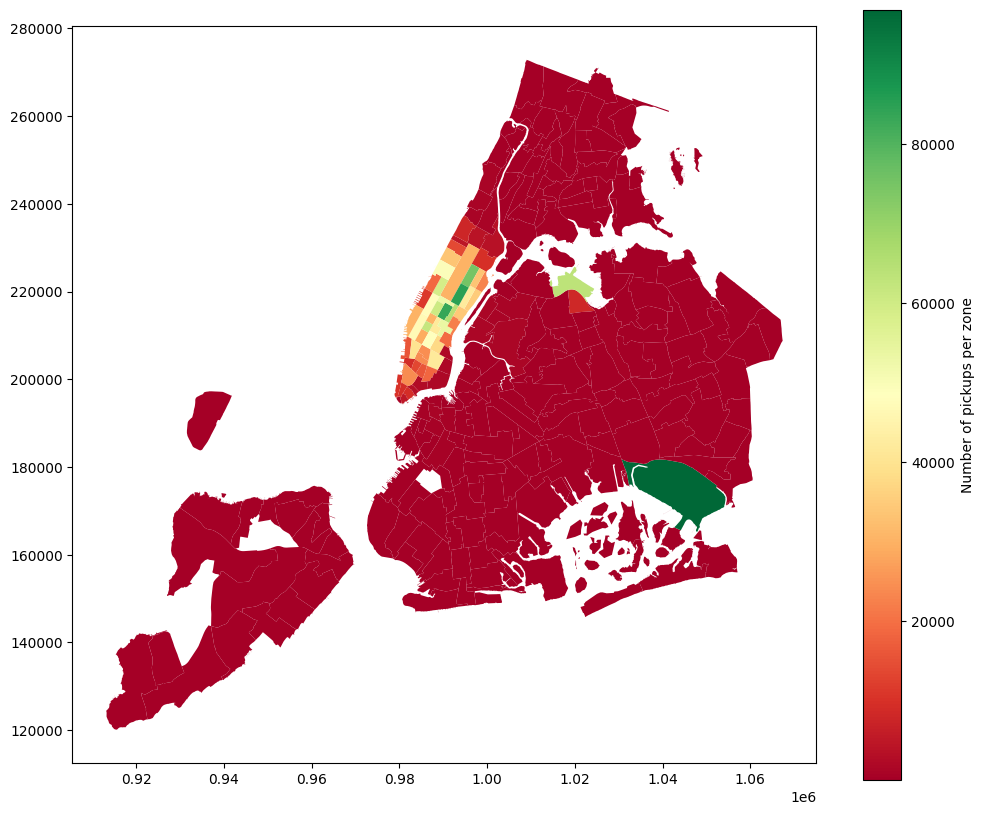

In [91]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(
    column='trip_count',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Number of pickups per zone", 'orientation': "vertical"},
    cmap='RdYlGn'
)
plt.show()


In [92]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by='trip_count', ascending=False)
zones_sorted.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,96912.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237.0,85169.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161.0,83556.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236.0,75009.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162.0,64659.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [96]:
# Find routes which have the slowest speeds at different times of the day
merged_df['avg_speed'] = merged_df['trip_distance'] / merged_df['trip_duration']
df_speed = merged_df[merged_df['trip_duration'] > 0]
df_speed.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,month,payment_type_label,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,avg_speed
2,2,2023-01-05 21:43:31,2023-01-05 22:02:07,2.0,4.62,1.0,68,262,1,22.6,...,2023-01,Credit Card,68.0,0.049337,0.000111,East Chelsea,68.0,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20...",159.062171
5,2,2023-01-05 21:36:12,2023-01-05 21:58:13,1.0,4.79,1.0,107,75,1,26.1,...,2023-01,Credit Card,107.0,0.038041,0.000075,Gramercy,107.0,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20...",43.860698
6,2,2023-01-05 21:52:58,2023-01-05 22:28:18,1.0,17.76,2.0,132,230,1,70.0,...,2023-01,Credit Card,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",42.119840
16,2,2023-01-05 21:13:01,2023-01-05 21:31:13,1.0,8.97,1.0,138,238,1,35.9,...,2023-01,Credit Card,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",456.252261
20,2,2023-01-05 21:00:46,2023-01-05 21:34:46,2.0,17.48,2.0,132,246,1,70.0,...,2023-01,Credit Card,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",44.777979


In [97]:
df_speed['pickup_hour'] = df_speed['tpep_pickup_datetime'].dt.hour
df_speed_ev = df_speed.groupby(['pickup_hour', 'PULocationID', 'DOLocationID'])['avg_speed'].mean().reset_index()
slowest_by_hour = df_speed_ev.sort_values(by=['pickup_hour', 'avg_speed']).groupby('pickup_hour').first().reset_index()
slowest_by_hour

<ipython-input-97-4a91b29d3a7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed['pickup_hour'] = df_speed['tpep_pickup_datetime'].dt.hour


,pickup_hour,PULocationID,DOLocationID,avg_speed
0,0,151,24,0.012810
1,1,151,24,0.015324
2,2,249,114,0.015247
3,3,144,79,0.017955
4,4,148,195,0.178006
5,5,161,162,0.030827
6,6,161,140,0.053580
7,7,216,216,0.016081
8,8,142,163,0.009419
9,9,90,234,0.029284


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

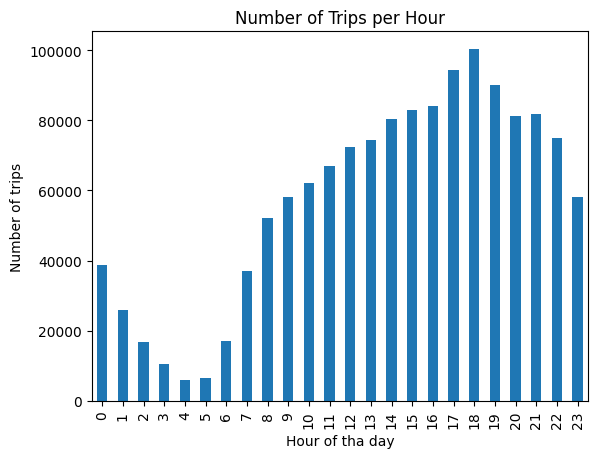

In [98]:
# Visualise the number of trips per hour and find the busiest hour
merged_df['pickup_hour'] = merged_df['tpep_pickup_datetime'].dt.hour
hourly_counts = merged_df['pickup_hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of tha day')
plt.ylabel('Number of trips')
plt.show()

In [99]:
busiest_hour = hourly_counts.idxmax()
busiest_hour

np.int32(18)

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [100]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.25
hourly_counts_sample = merged_df['pickup_hour'].value_counts().sort_index()
hourly_counts_scaled = hourly_counts_sample / sample_fraction
hourly_counts_scaled

,count
pickup_hour,
0,155264.0
1,104212.0
2,66876.0
3,41920.0
4,23892.0
5,26072.0
6,67908.0
7,147940.0
8,208964.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

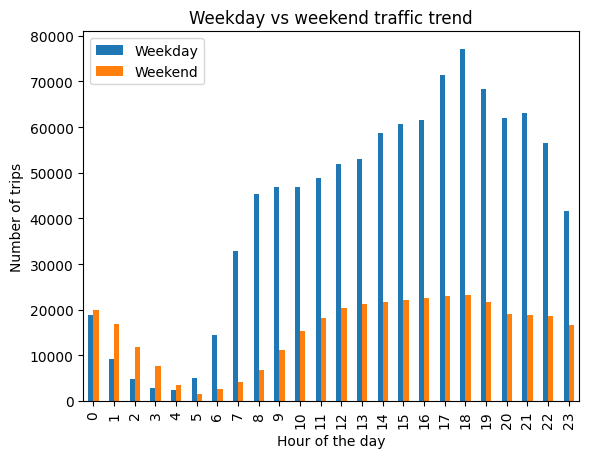

In [101]:
# Compare traffic trends for the week days and weekends
merged_df['day_of_week'] = merged_df['tpep_pickup_datetime'].dt.dayofweek
merged_df['weekend'] = merged_df['day_of_week'] >= 5
traffic_trends = merged_df.groupby(['pickup_hour', 'weekend']).size().unstack()
traffic_trends.plot(kind='bar')
plt.title('Weekday vs weekend traffic trend')
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips')
plt.legend(['Weekday', 'Weekend'])
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [102]:
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,245.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,5.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1807.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN,NaN


In [103]:
# Find top 10 pickup and dropoff zones
top_pu = merged_df['PULocationID'].value_counts().head(10).reset_index()
top_pu.columns = ['LocationID', 'pickup_count']
top_pu = top_pu.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

top_do = merged_df['DOLocationID'].value_counts().head(10).reset_index()
top_do.columns = ['LocationID', 'dropoff_count']
top_do = top_do.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

In [104]:
top_pu

,LocationID,pickup_count,zone
0,237,68105,Upper East Side South
1,161,65392,Midtown Center
2,132,62369,JFK Airport
3,236,61325,Upper East Side North
4,162,51330,Midtown East
5,138,50350,LaGuardia Airport
6,142,47132,Lincoln Square East
7,186,46916,Penn Station/Madison Sq West
8,230,43116,Times Sq/Theatre District
9,170,42054,Murray Hill


In [105]:
top_do

,LocationID,dropoff_count,zone
0,236,65565,Upper East Side North
1,237,60988,Upper East Side South
2,161,53397,Midtown Center
3,170,41875,Murray Hill
4,239,41016,Upper West Side South
5,142,40392,Lincoln Square East
6,162,40200,Midtown East
7,141,38699,Lenox Hill West
8,230,38382,Times Sq/Theatre District
9,68,35166,East Chelsea


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [107]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
top_pu['pickup_count'] = top_pu['pickup_count'].fillna(0)
top_do['dropoff_count'] = top_do['dropoff_count'].fillna(0)
pickup_dropoff_ratio = top_pu['pickup_count'] / (top_do['dropoff_count']+1)
pickup_dropoff_ratio

,0
0,1.038724
1,1.072193
2,1.168003
3,1.464443
4,1.251432
5,1.246503
6,1.172409
7,1.212300
8,1.123310
9,1.195837


In [108]:
bottom_pu = top_pu.sort_values(by='pickup_count', ascending=True).head(10)
bottom_do = top_do.sort_values(by='dropoff_count', ascending=True).head(10)
bottom_pu['pickup_count'] = bottom_pu['pickup_count'].fillna(0)
bottom_do['dropoff_count'] = bottom_do['dropoff_count'].fillna(0)
pickup_dropoff_ratio_bottom = bottom_pu['pickup_count'] / (bottom_do['dropoff_count']+1)
pickup_dropoff_ratio_bottom

,0
9,1.195837
8,1.123310
7,1.212300
6,1.172409
5,1.246503
4,1.251432
3,1.464443
2,1.168003
1,1.072193
0,1.038724


In [109]:
bottom_pu

,LocationID,pickup_count,zone
9,170,42054,Murray Hill
8,230,43116,Times Sq/Theatre District
7,186,46916,Penn Station/Madison Sq West
6,142,47132,Lincoln Square East
5,138,50350,LaGuardia Airport
4,162,51330,Midtown East
3,236,61325,Upper East Side North
2,132,62369,JFK Airport
1,161,65392,Midtown Center
0,237,68105,Upper East Side South


In [110]:
bottom_do

,LocationID,dropoff_count,zone
9,68,35166,East Chelsea
8,230,38382,Times Sq/Theatre District
7,141,38699,Lenox Hill West
6,162,40200,Midtown East
5,142,40392,Lincoln Square East
4,239,41016,Upper West Side South
3,170,41875,Murray Hill
2,161,53397,Midtown Center
1,237,60988,Upper East Side South
0,236,65565,Upper East Side North


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [111]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df = merged_df[(merged_df['pickup_hour'] >= 23) | (merged_df['pickup_hour'] <= 5)]
top_night_pu = night_df['PULocationID'].value_counts().head(10).reset_index()
top_night_pu.columns = ['LocationID', 'pickup_count']
top_night_pu = top_night_pu.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

top_night_do = night_df['DOLocationID'].value_counts().head(10).reset_index()
top_night_do.columns = ['LocationID', 'dropoff_count']
top_night_do = top_night_do.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

In [112]:
top_night_pu

,LocationID,pickup_count,zone
0,79,12332,East Village
1,249,10536,West Village
2,132,9450,JFK Airport
3,148,7816,Lower East Side
4,48,7641,Clinton East
5,114,7249,Greenwich Village South
6,230,5672,Times Sq/Theatre District
7,186,5264,Penn Station/Madison Sq West
8,164,4732,Midtown South
9,138,4639,LaGuardia Airport


In [113]:
top_night_do

,LocationID,dropoff_count,zone
0,79,6502,East Village
1,48,5088,Clinton East
2,170,4974,Murray Hill
3,107,4635,Gramercy
4,141,4371,Lenox Hill West
5,68,4333,East Chelsea
6,263,4266,Yorkville West
7,249,4146,West Village
8,236,3558,Upper East Side North
9,90,3539,Flatiron


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [114]:
# Filter for night hours (11 PM to 5 AM)
merged_df['time_period'] = merged_df['pickup_hour'].apply(lambda x: 'Night' if x >= 23 or x <= 5 else 'Day')
revenue_by_time = merged_df.groupby('time_period')['total_amount'].sum()
revenue_share = (revenue_by_time / revenue_by_time.sum()) * 100
revenue_share

,total_amount
time_period,
Day,88.002659
Night,11.997341


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [115]:
# Analyse the fare per mile per passenger for different passenger counts
df_clean = merged_df[(merged_df['passenger_count'] > 0) & (merged_df['trip_distance'] > 0)]
df_clean['fare_per_mile_per_passenger'] = df_clean['fare_amount'] / (df_clean['trip_distance'] * df_clean['passenger_count'])
fare_analysis = df_clean.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
fare_analysis

,passenger_count,fare_per_mile_per_passenger
0,1.0,9.162538
1,2.0,5.238108
2,3.0,3.543022
3,4.0,4.359092
4,5.0,1.587262
5,6.0,1.308200


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [116]:
# Compare the average fare per mile for different days and for different times of the day
df_clean_dist = merged_df[merged_df['trip_distance'] > 0]
df_clean_dist['fare_per_mile'] = df_clean_dist['fare_amount'] / df_clean_dist['trip_distance']
df_clean_dist['day_of_week'] = df_clean_dist['tpep_pickup_datetime'].dt.day_name()
df_clean_dist['hour'] = df_clean_dist['tpep_pickup_datetime'].dt.hour
avg_fare_by_day = df_clean_dist.groupby('day_of_week')['fare_per_mile'].mean().reset_index()
avg_fare_by_hour = df_clean_dist.groupby('hour')['fare_per_mile'].mean().reset_index()


In [117]:
avg_fare_by_day

,day_of_week,fare_per_mile
0,Friday,9.801607
1,Monday,8.948929
2,Saturday,9.276051
3,Sunday,9.530202
4,Thursday,9.741872
5,Tuesday,9.341922
6,Wednesday,9.965888


In [118]:
avg_fare_by_hour

,hour,fare_per_mile
0,0,8.921752
1,1,9.179054
2,2,7.277945
3,3,8.507467
4,4,13.683168
5,5,13.363542
6,6,11.085956
7,7,8.812593
8,8,8.842622
9,9,9.460717


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [119]:
# Compare fare per mile for different vendors
df_clean_dist = merged_df[merged_df['trip_distance'] > 0]
df_clean_dist['fare_per_mile'] = df_clean_dist['fare_amount'] / df_clean_dist['trip_distance']
fare_by_vendor = df_clean_dist.groupby('VendorID')['fare_per_mile'].mean().reset_index()
fare_by_vendor

,VendorID,fare_per_mile
0,1,7.905834
1,2,10.047143


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [120]:
df_nonzero.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,hourly_pickups,pickup_day,pickup_month,month,payment_type_label
0,1,2023-01-05 21:42:49,2023-01-05 21:52:45,1.0,2.10,1.0,148,233,1,12.8,...,1.0,21.36,2.5,0.0,-0.174298,21,Thursday,January,2023-01,Credit Card
1,2,2023-01-05 21:13:55,2023-01-05 21:27:31,1.0,3.68,1.0,107,226,1,17.7,...,1.0,36.56,2.5,0.0,-0.088268,21,Thursday,January,2023-01,Credit Card


In [121]:
df_nonzero.trip_distance.unique()

array([ 2.1 ,  3.68,  4.62, ..., 45.  , 46.01, 34.71])

In [122]:
# Defining distance tiers
bins = [0, 10, 20, 30, float('inf')]
labels = ['0–10 mi', '10–20 mi', '20–30 mi', '30+ mi']
merged_df['distance_tier'] = pd.cut(merged_df['trip_distance'], bins=bins, labels=labels)

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [123]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
merged_df = merged_df[merged_df['fare_amount'] > 0]
merged_df['tip_percent'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100
tip_by_distance = merged_df.groupby('distance_tier')['tip_percent'].mean().reset_index()
tip_by_passenger = merged_df.groupby('passenger_count')['tip_percent'].mean().reset_index()
tip_by_hour = merged_df.groupby('pickup_hour')['tip_percent'].mean().reset_index()

<ipython-input-123-df100058312f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = merged_df.groupby('distance_tier')['tip_percent'].mean().reset_index()


In [124]:
tip_by_distance

,distance_tier,tip_percent
0,0–10 mi,27.368997
1,10–20 mi,21.660856
2,20–30 mi,20.326256
3,30+ mi,17.027373


In [125]:
tip_by_passenger

,passenger_count,tip_percent
0,1.0,26.330110
1,2.0,25.860987
2,3.0,25.813254
3,4.0,61.650811
4,5.0,26.027944
5,6.0,26.085324


In [126]:
tip_by_hour

,pickup_hour,tip_percent
0,0,25.876757
1,1,25.966341
2,2,26.510323
3,3,27.222189
4,4,26.442685
5,5,26.499100
6,6,25.192442
7,7,24.930261
8,8,25.019107
9,9,25.270024


In [128]:
Fare_vendor = merged_df[(merged_df['trip_distance'] > 0) & (merged_df['fare_amount'] > 0)]
Fare_vendor['fare_per_mile'] = Fare_vendor['fare_amount'] / Fare_vendor['trip_distance']
vendor_fare_tiers = Fare_vendor.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
vendor_fare_tiers

<ipython-input-128-60b35af87bc4>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendor_fare_tiers = Fare_vendor.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()


,VendorID,distance_tier,fare_per_mile
0,1,0–10 mi,8.186814
1,1,10–20 mi,4.187495
2,1,20–30 mi,3.562762
3,1,30+ mi,4.499892
4,2,0–10 mi,10.609478
5,2,10–20 mi,4.217305
6,2,20–30 mi,3.606894
7,2,30+ mi,4.578029


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [129]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip = merged_df[merged_df['tip_percent'] < 10]
high_tip = merged_df[merged_df['tip_percent'] > 25]

In [111]:
low_tip.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_month,month,payment_type_label,avg_speed,pickup_hour,day_of_week,weekend,time_period,distance_tier,tip_percent
29,2,2023-01-05 21:01:54,2023-01-05 21:23:20,1.0,8.15,1.0,237,52,1,35.2,...,January,2023-01,Credit Card,85.319920,21,3,False,Day,0–10 mi,8.522727
31,2,2023-01-05 21:10:23,2023-01-05 21:19:23,1.0,1.99,1.0,163,236,1,12.1,...,January,2023-01,Credit Card,-10.142896,21,3,False,Day,0–10 mi,7.438017
82,2,2023-01-05 21:05:30,2023-01-05 21:25:59,3.0,3.77,1.0,239,42,1,22.6,...,January,2023-01,Credit Card,51.479323,21,3,False,Day,0–10 mi,8.849558
90,2,2023-01-05 21:35:50,2023-01-05 22:02:49,1.0,6.03,1.0,125,236,1,31.0,...,January,2023-01,Credit Card,26.712066,21,3,False,Day,0–10 mi,9.677419
97,2,2023-01-05 21:37:22,2023-01-05 22:03:38,1.0,17.87,2.0,132,232,1,70.0,...,January,2023-01,Credit Card,85.532775,21,3,False,Day,10–20 mi,7.142857


In [130]:
high_tip.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,LocationID,borough,geometry,avg_speed,pickup_hour,day_of_week,weekend,time_period,distance_tier,tip_percent
0,1,2023-01-05 21:42:49,2023-01-05 21:52:45,1.0,2.10,1.0,148,233,1,12.8,...,148.0,Manhattan,"POLYGON ((988552.836 201677.665, 988387.669 20...",-12.048335,21,3,False,Day,0–10 mi,27.812500
1,2,2023-01-05 21:13:55,2023-01-05 21:27:31,1.0,3.68,1.0,107,226,1,17.7,...,107.0,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20...",-41.691151,21,3,False,Day,0–10 mi,41.299435
3,1,2023-01-05 21:32:04,2023-01-05 21:42:21,1.0,2.30,1.0,162,114,1,12.1,...,162.0,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",-13.848247,21,3,False,Day,0–10 mi,28.099174
4,2,2023-01-05 21:00:51,2023-01-05 21:05:17,1.0,0.92,1.0,229,140,1,6.5,...,229.0,Manhattan,"POLYGON ((994880.664 214401.395, 994724.359 21...",-3.032874,21,3,False,Day,0–10 mi,30.769231
6,2,2023-01-05 21:52:58,2023-01-05 22:28:18,1.0,17.76,2.0,132,230,1,70.0,...,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",42.119840,21,3,False,Day,10–20 mi,26.428571


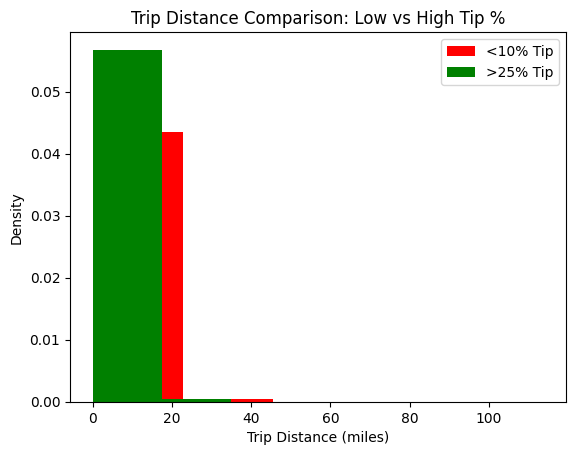

In [131]:
plt.hist(low_tip['trip_distance'], bins=5, label='<10% Tip', color='red', density=True)
plt.hist(high_tip['trip_distance'], bins=5, label='>25% Tip', color='green', density=True)
plt.title('Trip Distance Comparison: Low vs High Tip %')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Density')
plt.legend()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

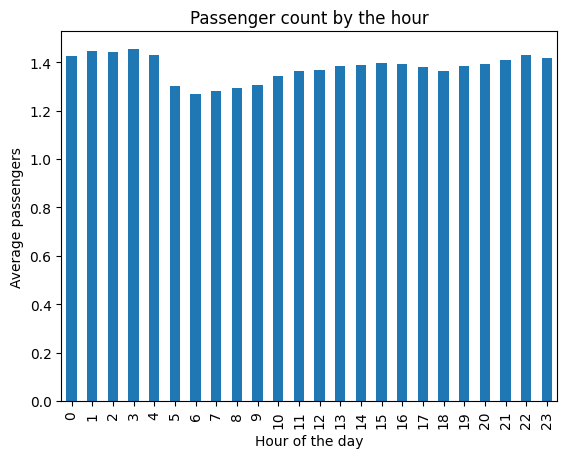

In [132]:
# See how passenger count varies across hours and days
passengers_by_hour = merged_df.groupby('pickup_hour')['passenger_count'].mean()
passengers_by_hour.plot(kind='bar')
plt.title('Passenger count by the hour')
plt.xlabel('Hour of the day')
plt.ylabel('Average passengers')
plt.show()

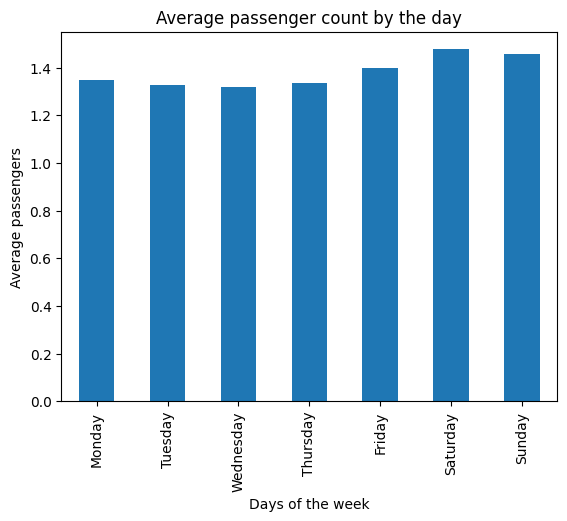

In [133]:
merged_df['day_name'] = merged_df['tpep_pickup_datetime'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passengers_by_day = merged_df.groupby('day_name')['passenger_count'].mean().reindex(days_order)
passengers_by_day.plot(kind='bar')
plt.title('Average passenger count by the day')
plt.xlabel('Days of the week')
plt.ylabel('Average passengers')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [134]:
# How does passenger count vary across zones
avg_passenger_by_zone = merged_df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone

,PULocationID,passenger_count
0,1,1.928571
1,2,1.000000
2,3,3.500000
3,4,1.461151
4,6,1.000000
...,...,...
219,261,1.504301
220,262,1.322982
221,263,1.348763
222,264,1.357804


In [117]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_by_zone = avg_passenger_by_zone.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
avg_passenger_by_zone = avg_passenger_by_zone.sort_values(by='passenger_count', ascending=False)
avg_passenger_by_zone

,PULocationID,passenger_count,LocationID,zone
2,3,3.500000,3.0,Allerton/Pelham Gardens
40,47,3.000000,47.0,Claremont/Bathgate
98,117,3.000000,117.0,Hammels/Arverne
74,86,2.500000,86.0,Far Rockaway
131,155,2.333333,155.0,Marine Park/Mill Basin
...,...,...,...,...
161,192,1.000000,192.0,Queensboro Hill
172,203,1.000000,203.0,Rosedale
205,242,1.000000,242.0,Van Nest/Morris Park
208,245,1.000000,245.0,West Brighton


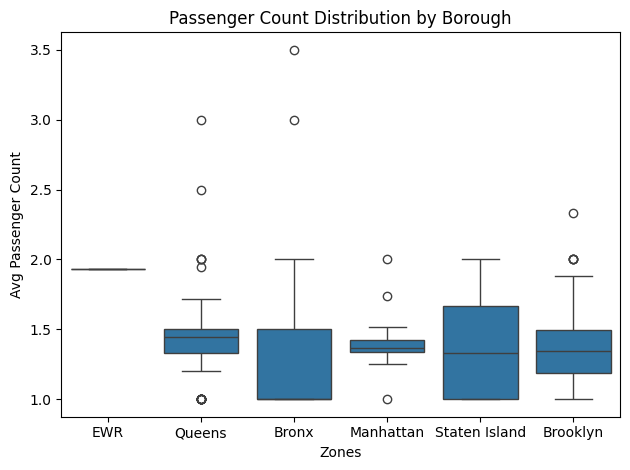

In [145]:
zones_with_passenger = avg_passenger_by_zone.merge(zones[['LocationID', 'borough']], on='LocationID', how='left')

sns.boxplot(data=zones_with_passenger, x='borough', y='passenger_count')
plt.title('Passenger Count Distribution by Borough')
plt.ylabel('Avg Passenger Count')
plt.xlabel('Zones')
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [146]:
# How often is each surcharge applied?
surcharge_cols = ['improvement_surcharge', 'congestion_surcharge']

for col in surcharge_cols:
    print("\n")
    print(df_nonzero[col].value_counts().sort_index())




improvement_surcharge
0.0         15
0.3        500
1.0    1372694
Name: count, dtype: int64


congestion_surcharge
0.0      69736
2.5    1303473
Name: count, dtype: int64


In [135]:
extra_by_hour = merged_df.groupby(['pickup_hour', 'extra']).size().unstack(fill_value=0)
extra_by_hour

extra,0.00,0.03,0.06,0.09,0.25,0.50,0.70,0.75,1.00,1.25,...,8.50,8.75,9.25,9.75,10.00,10.25,11.25,11.75,12.50,14.25
pickup_hour,,,,,,,,,,,,,,,,,,,,,
0,1291,0,0,0,0,1,0,0,28215,7,...,1,0,0,44,0,108,0,0,0,0
1,588,0,0,1,0,0,0,0,19785,4,...,1,0,0,11,0,15,0,0,0,0
2,220,0,0,0,0,0,0,0,12878,2,...,3,0,0,0,0,5,0,0,0,0
3,205,0,0,0,0,0,1,0,7956,0,...,30,0,1,0,0,0,0,0,0,0
4,374,0,0,0,0,1,0,0,3940,0,...,91,0,2,0,0,1,0,0,0,0
5,856,0,0,0,0,1,0,0,3547,8,...,131,1,0,0,0,1,0,0,0,0
6,11297,0,0,0,0,0,0,0,449,67,...,3,0,7,0,1,0,0,0,0,0
7,26098,0,0,0,0,0,0,0,8,48,...,0,24,79,0,0,0,0,0,0,0
8,37106,0,0,0,0,0,0,0,7,26,...,1,58,187,0,0,1,0,2,0,0


In [140]:
merged_df['dropoff_hour'] = merged_df['tpep_dropoff_datetime'].dt.hour
extra_by_hour_do = merged_df.groupby(['dropoff_hour', 'extra']).size().unstack(fill_value=0)
extra_by_hour_do

extra,0.00,0.03,0.06,0.09,0.25,0.50,0.70,0.75,1.00,1.25,...,8.50,8.75,9.25,9.75,10.00,10.25,11.25,11.75,12.50,14.25
dropoff_hour,,,,,,,,,,,,,,,,,,,,,
0,1998,0,0,0,0,1,0,0,31193,16,...,2,1,0,79,0,210,0,0,0,0
1,995,0,0,1,0,0,0,0,21634,4,...,0,0,0,15,0,32,0,0,0,0
2,360,0,0,0,0,0,0,0,14201,3,...,1,0,0,1,0,6,0,0,0,0
3,180,0,0,0,0,0,1,0,8750,1,...,16,0,0,1,0,1,0,0,0,0
4,276,0,0,0,0,0,0,0,4727,0,...,76,0,3,0,0,1,0,0,0,0
5,550,0,0,0,0,1,0,0,3213,1,...,114,1,0,0,0,1,0,0,0,0
6,8427,0,0,0,0,1,0,0,1257,28,...,52,0,2,0,1,0,0,0,0,0
7,22346,0,0,0,0,0,0,0,11,61,...,0,3,25,0,0,0,0,0,0,0
8,34725,0,0,0,0,0,0,0,5,38,...,1,36,110,0,0,1,0,0,0,0


In [164]:
extra_by_pu_zone = df_nonzero.groupby(['PULocationID', 'extra']).size().unstack(fill_value=0)
extra_by_pu_zone_percent = extra_by_pu_zone.div(extra_by_pu_zone.sum(axis=1), axis=0) * 100
extra_by_pu_zone_percent = extra_by_pu_zone_percent.merge(zones[['LocationID', 'zone']], left_index=True, right_on='LocationID', how='left')
extra_by_pu_zone_percent_sorted = extra_by_pu_zone_percent.sort_values(by=1.00, ascending=False)
print(extra_by_pu_zone_percent_sorted[['zone', 1.00]].head(10))

                               zone         1.0
17.0                   Bedford Park  100.000000
20.0               Bensonhurst East  100.000000
85.0                   Far Rockaway  100.000000
77.0                   East Tremont  100.000000
71.0   East Flatbush/Remsen Village  100.000000
200.0                 Rockaway Park  100.000000
211.0            Soundview/Bruckner  100.000000
244.0                 West Brighton  100.000000
164.0                       Midwood  100.000000
219.0    Spuyten Duyvil/Kingsbridge   83.333333


In [165]:
extra_by_do_zone = df_nonzero.groupby(['DOLocationID', 'extra']).size().unstack(fill_value=0)
extra_by_do_zone_percent = extra_by_do_zone.div(extra_by_do_zone.sum(axis=1), axis=0) * 100
extra_by_do_zone_percent = extra_by_do_zone_percent.merge(zones[['LocationID', 'zone']], left_index=True, right_on='LocationID', how='left')
extra_by_do_zone_percent_sorted = extra_by_do_zone_percent.sort_values(by=1.00, ascending=False)
print(extra_by_do_zone_percent_sorted[['zone', 1.00]].head(10))

                                    zone        1.0
83.0   Eltingville/Annadale/Prince's Bay  60.000000
175.0                            Oakwood  57.142857
110.0                Green-Wood Cemetery  54.545455
114.0                Grymes Hill/Clifton  53.846154
213.0           South Beach/Dongan Hills  50.000000
183.0                    Pelham Bay Park  50.000000
4.0                        Arden Heights  50.000000
21.0                    Bensonhurst West  49.074074
10.0                          Bath Beach  46.428571
221.0                      Starrett City  45.945946


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [150]:
# Reposition idle taxis toward high-pickup zones
total_demand = merged_df.groupby('PULocationID').size().reset_index(name='trip_count')
total_demand = total_demand.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
top10_zones = total_demand.sort_values(by='trip_count', ascending=False).head(10)
top10_zones

,PULocationID,trip_count,LocationID,zone
201,237,68105,237.0,Upper East Side South
136,161,65392,161.0,Midtown Center
111,132,62369,132.0,JFK Airport
200,236,61325,236.0,Upper East Side North
137,162,51330,162.0,Midtown East
116,138,50350,138.0,LaGuardia Airport
119,142,47132,142.0,Lincoln Square East
155,186,46916,186.0,Penn Station/Madison Sq West
194,230,43116,230.0,Times Sq/Theatre District
145,170,42054,170.0,Murray Hill


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

<Axes: title={'center': 'Monthly Trip Demand'}, xlabel='month'>

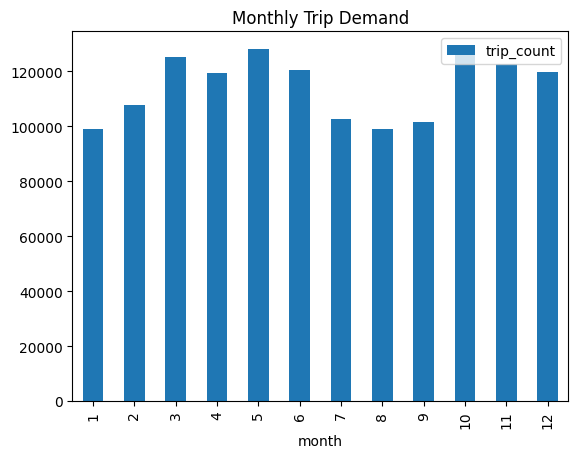

In [156]:
#Monthly trends show peaks in tourist-heavy months
df_nonzero['month'] = df_nonzero['tpep_pickup_datetime'].dt.month
monthly_demand = df_nonzero.groupby('month').size().reset_index(name='trip_count')

monthly_demand.plot(x='month', y='trip_count', kind='bar', title='Monthly Trip Demand')

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [158]:
#High demand (and tipping) during evening rush and weekend nights. mplement dynamic pricing with slight surcharges during peak hours (e.g., 5–8 PM, Fri/Sat nights)
merged_df.groupby('pickup_hour')['tip_percent'].mean()

,tip_percent
pickup_hour,
0,25.877087
1,25.970898
2,26.510323
3,27.222189
4,26.442685
5,26.499100
6,25.192432
7,24.930261
8,25.019067
